# Final Assignment

## 1. Introduction
### 1.1 Business Problem Description
Santiago de Chile is the largest city in Santiago, concentrating over 7 million people in a country which total population is 17.5 million, comprising more than 40% of Chile's total population in one city.  This city is divided into 37 counties/districts located in an area of 837.89 squared kilometers(source)(s2). This creates huge differences in density for each district translating into a critical decision for a new business on where to focus their efforts to start with. 
As an entrepreneur the idea of creating a new business in this city could cause big headaches as to where should it be located and what should be the target market. 
This report will be guided by the following questions:
	1. What is the best district in the city of Santiago, Chile for a new business?  
	2. What should be the focus of this new business to thrive in that county?
	3. Can that business expand to other districts?
We will leverage the results of the Chilean National Institute of Statistics regarding population by district, correlating it to their geographical placement and the venue density, and type in each district via the Foursquare API.

### 1.2 Data Description
The following information sources will be considered for this project.
- Venue Information
-- Forsquare API to retrieve every venue located in the city of Santiago.
- Demographics
-- Information is being leveraged from the INE (National Institute of Statistics) regarding the population of all the districts.
- Geographical information
-- I researched for the location of all the districts in Santiago.


In [1]:
# The code was removed by Watson Studio for sharing.

In [14]:
# The code was removed by Watson Studio for sharing.

,Comuna,Latitude,Longitude,Hombres,Mujeres,Total
0,San Ramon,-33.542156,-70.647184,40873,42027,82900
1,Renca,-33.403697,-70.713522,72681,74470,147151
2,Pedro Aguirre Cerda,-33.488703,-70.670953,49513,51661,101174
3,La Granja,-33.538966,-70.619992,57025,59546,116571
4,El Bosque,-33.553833,-70.673269,79372,83133,162505


In [12]:
# The code was removed by Watson Studio for sharing.

The geograpical coordinates of Santiago are -33.4377968, -70.6504451.


In [16]:
# The code was removed by Watson Studio for sharing.

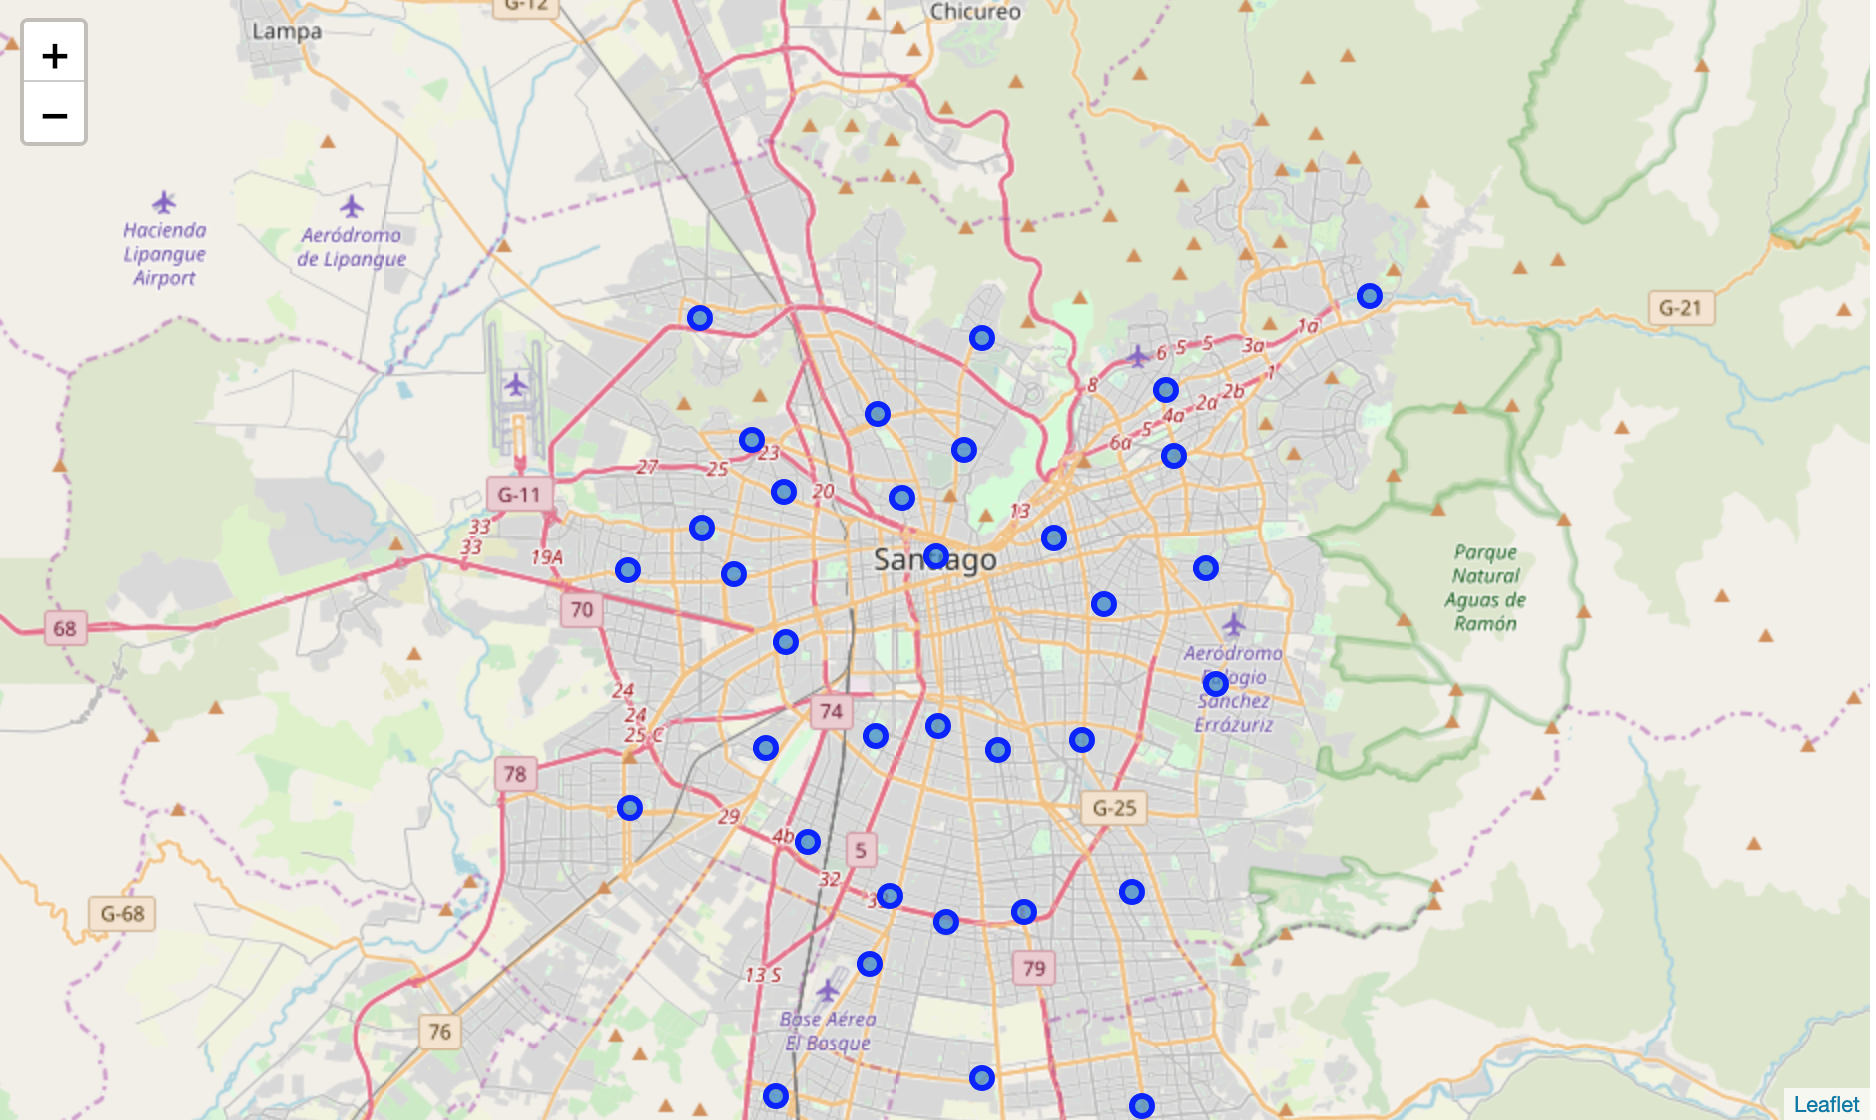